# IRIS DATASET VISUALIZATION 
BY- SAGAR MANNA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [3]:
df = pd.DataFrame(iris_data.data)
df.columns = iris_data.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['Species'] = iris_data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [26]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


# Checking pairplot 

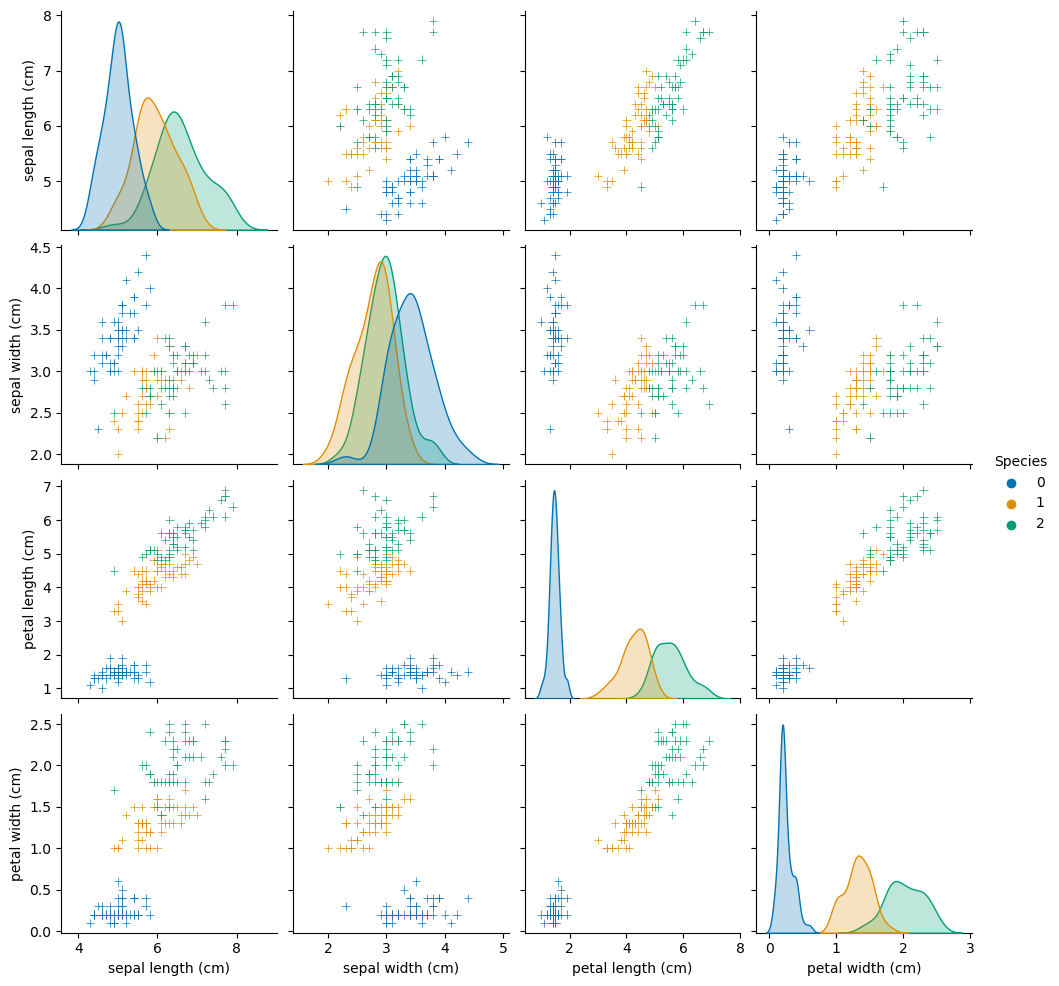

In [6]:
sns.pairplot(df, hue='Species', markers='+', palette='colorblind')
plt.show()

# showing heatmap 

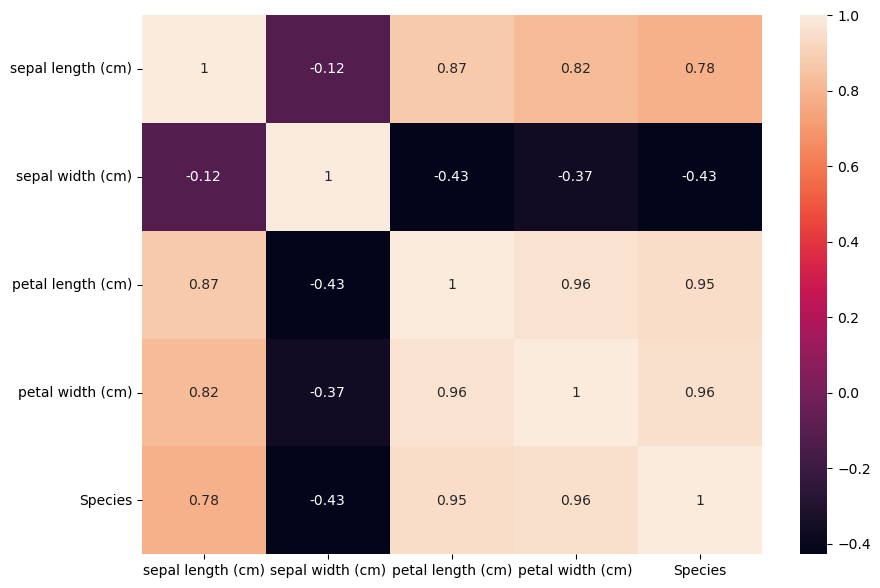

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

# scatterplot

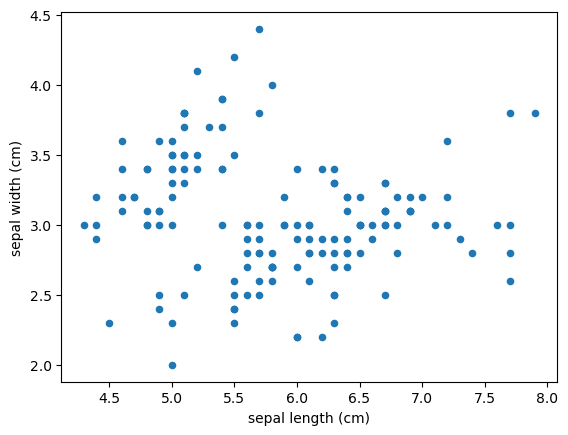

In [8]:
df.plot(kind='scatter', x="sepal length (cm)", y="sepal width (cm)")
plt.show()

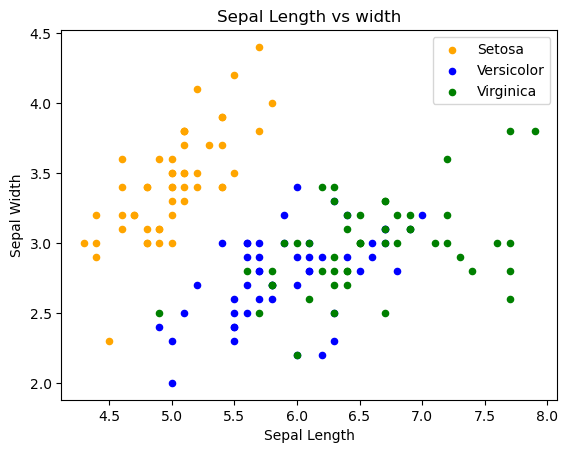

In [9]:
fig=df[df.Species==0].plot(kind='scatter', x="sepal length (cm)", y="sepal width (cm)", 
                           color='orange', label='Setosa')
df[df.Species==1].plot(kind='scatter', x="sepal length (cm)", y="sepal width (cm)", 
                           color='blue', label='Versicolor', ax=fig)
df[df.Species==2].plot(kind='scatter', x="sepal length (cm)", y="sepal width (cm)", 
                           color='green', label='Virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length vs width")
plt.show()

# vioinplot map

<Axes: xlabel='Species', ylabel='sepal length (cm)'>

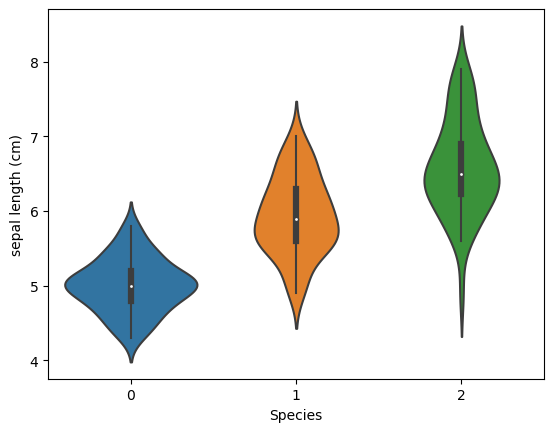

In [10]:
sns.violinplot(x="Species", y='sepal length (cm)', data=df)

# different type of violinplot

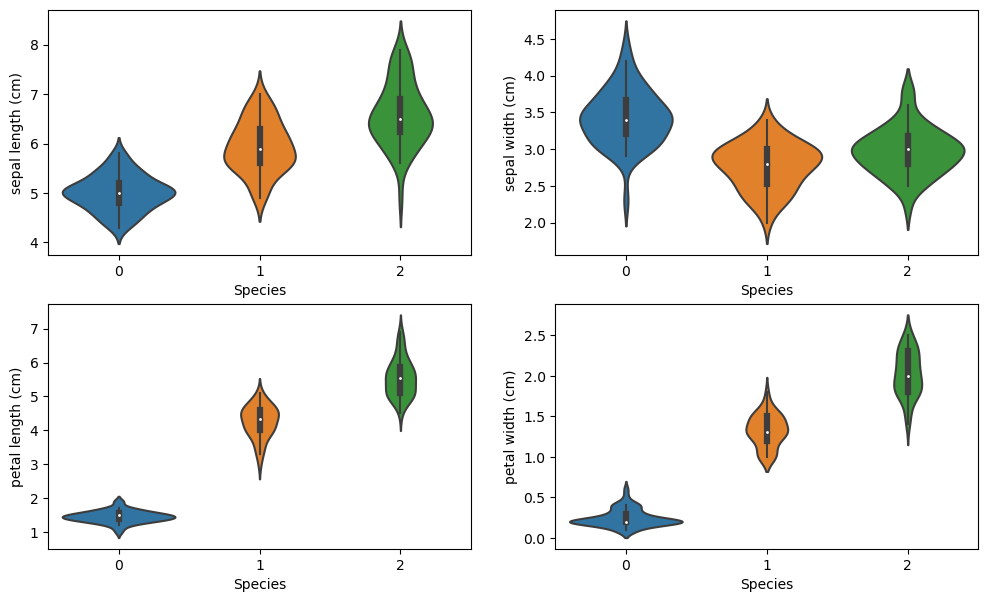

In [11]:
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
sns.violinplot(x="Species", y='sepal length (cm)', data=df)
plt.subplot(2,2,2)
sns.violinplot(x="Species", y='sepal width (cm)', data=df)
plt.subplot(2,2,3)
sns.violinplot(x="Species", y='petal length (cm)', data=df)
plt.subplot(2,2,4)
sns.violinplot(x="Species", y='petal width (cm)', data=df)
plt.show()

In [14]:
X = df.drop('Species', axis=1)
y = df['Species']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [16]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (120, 4)
X_test: (30, 4)
y_train: (120,)
y_test: (30,)


In [17]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, y_test)
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

Test accuracy: 100.00%


In [18]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [19]:
print(confusion_matrix(y_test, dtree_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# plot figure

[Text(0.3076923076923077, 0.9285714285714286, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.38461538461538464, 0.7857142857142857, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal width (cm) <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica'),
 Text(0.38461538461538464, 0.5, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = ve

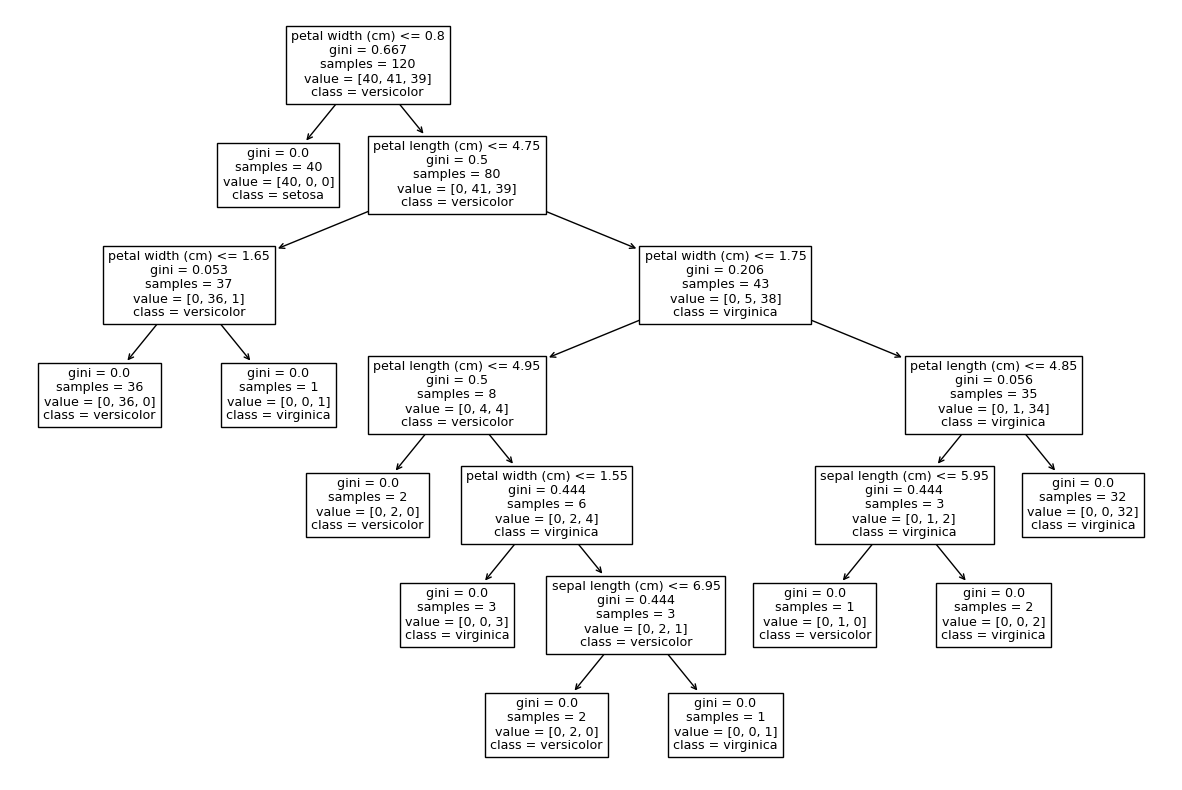

In [20]:
plt.figure(figsize=(15,10))
plot_tree(dtree, feature_names=iris_data.feature_names, class_names = iris_data['target_names'])

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_acc = accuracy_score(knn_pred, y_test)
print("Test accuracy: {:.2f}%".format(knn_acc*100))

Test accuracy: 100.00%


In [22]:
print(confusion_matrix(y_test, knn_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [24]:
data = {'sepal length (cm)':5.0, 'sepal width (cm)':3.4, 'petal length (cm)':1.4,
       'petal width (cm)':0.2}
index = [0]
new_df = pd.DataFrame(data, index)
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.0,3.4,1.4,0.2


In [25]:
value_pred = dtree.predict(new_df)
value_pred

array([0])